In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


In [6]:
X_Data = np.linspace(0 , 20 , 30)
Y_Data = -2*X_Data +1
X_Data , Y_Data = sk.utils.shuffle(X_Data , Y_Data)

In [7]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)
theta = np.array([0 , 0 ])
Y= np.dot(theta ,feture.T)
alpha = 0.001
Epoch = len(X_Data)

In [8]:
M = 0
Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 80
counter = 0
for j in range(Max_no_iter):
    if (counter!=0 and np.abs(Jtheta[-1]-Jtheta[-1*Epoch]) > 0.001):
        break
    
    for i in range(Epoch):
        counter +=1
        Y= np.dot(theta ,feture[i].T)
        Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data[i]) , feture[i])) ,axis = 0)))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data[i]) , feture[i]) ,axis = 0))
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
print(theta)  

[-1.7978569 -1.7978569]


In [9]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9821240740549952


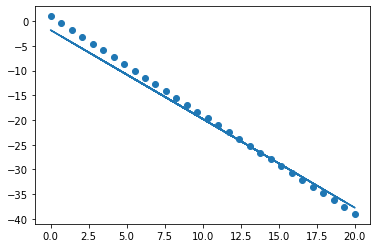

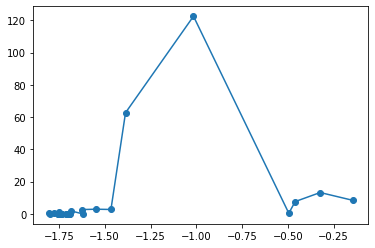

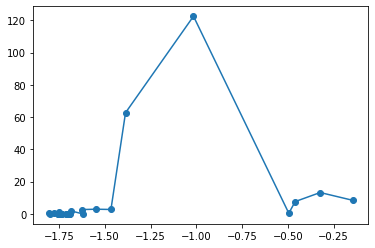

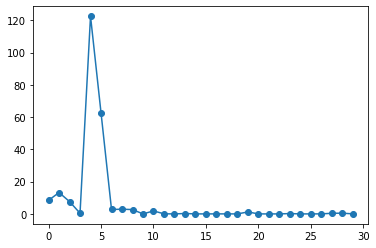

In [10]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.show()

plt.plot(theta_zero ,Jtheta , '-o' ) 
plt.show()

plt.plot(theta_one , Jtheta , '-o' ) 
plt.show()


plt.plot(np.arange(len(Jtheta)) , Jtheta , '-o' ) 
plt.show()

In [11]:
Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 10
for j in range(Max_no_iter):
    for i in range(Epoch):
        Y= np.dot(theta ,feture[i].T)
        Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data[i]) , feture[i])) ,axis = 0)))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data[i]) , feture[i]) ,axis = 0))
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
print(theta)

[-1.80499216 -1.80499216]


In [12]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9820319702026769


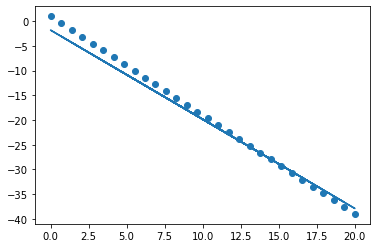

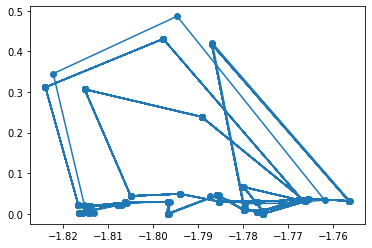

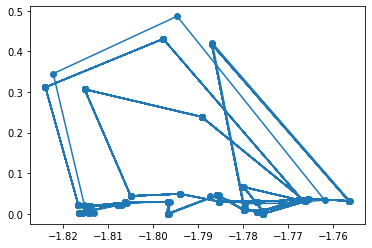

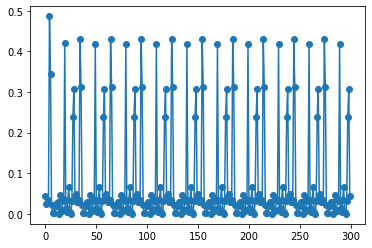

In [13]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.show()

plt.plot(theta_one , Jtheta , '-o') 
plt.show()


plt.plot(np.arange(Max_no_iter*Epoch) , Jtheta , '-o') 
plt.show()


# Generate Batches

In [14]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches

# Mini-Batch GD

In [25]:
M = 0
Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 20
Batch_Size = 3
feture_Mini = Generate_Batches(feture , Batch_Size)
Y_mini = Generate_Batches(Y_Data , Batch_Size)
for j in range(Max_no_iter):
    for i in range(len(feture_Mini)):
        Y= np.dot(theta ,feture_Mini[i].T)
        Jtheta.append((alpha/2*len(feture_Mini))*(np.sum(np.square(np.dot( (Y-Y_mini[i]) , feture_Mini[i])) ,axis = 0)))
        theta = theta - (alpha/len(feture_Mini))*(np.sum(np.dot( (Y-Y_mini[i]) , feture_Mini[i]) ,axis = 0))
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
print(theta)   

[-1.78835673 -1.78835673]


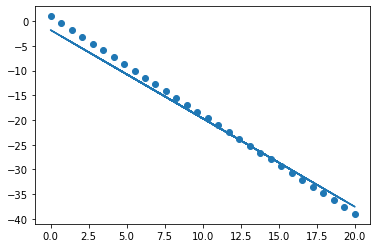

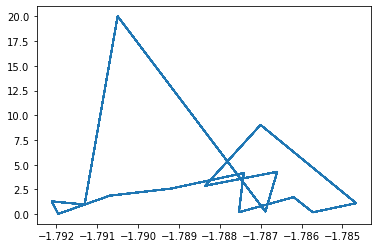

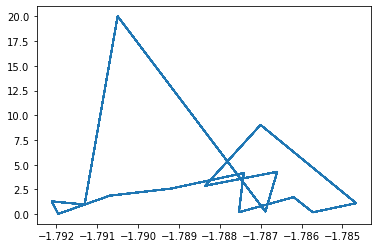

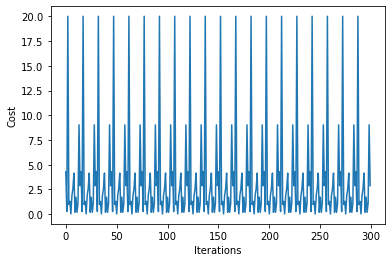

In [32]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.show()

plt.plot(theta_zero ,Jtheta ) 
plt.show()

plt.plot(theta_one , Jtheta ) 
plt.show()

plt.xlabel("Iterations" )
plt.ylabel("Cost")
plt.plot(np.arange(Max_no_iter*len(feture_Mini)) , Jtheta ) 
plt.show()